In [1]:
from utils.access_data import *

from utils.constants import *

import pandas as pd
pd.set_option('display.max_rows', 1000)

In [28]:
file_name = CATALOGUE_PATH + "Minerals.xls"
minerals = pd.read_excel(file_name)

In [32]:
minerals[minerals['Mineral Name'] == "Olivine"]

,Mineral Abbreviation,Mineral Name,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
98,OLV,Olivine,NaN,NaN,NaN,NaN,NaN


In [2]:
relab_db = get_data()

In [58]:
pd.set_option('display.max_columns', None)
show_cols=['SpectrumID', 'SpecCode','DetectAngle','SourceAngle','PhaseAngle','MinSize','MaxSize']

relab_db[relab_db['SampleID'] == "PL-CMP-006"]
# relab_db[relab_db['SpectrumID'] == "C1BE100"]

,SpectrumID,SampleID,Date,ReleaseDate,SpecCode,Start,Stop,Resolution,SourceAngle,DetectAngle,AzimuthAngle,PhaseAngle,Temperature,Atmosphere,PhotoFile,Spinning,Aperture,Scrambler,Depolarizer,User,NASA_PI_Sponsor,ResearchType,Reference,SampleName,PI,SI,SI2,Source,GeneralType1,GeneralType2,Type1,Type2,SubType,Modified,MinSize,MaxSize,Particulate,Texture,Origin,Location,Chem#,Text
18,C1PL06,PL-CMP-006,1984-10-22,2000-12-31,BD-VNIR,700,1800,10.0,30.0,0.0,0.0,30.0,Room,Ambient,NaN,NaN,NaN,NaN,NaN,CMP,NaN,NaN,NaN,Labradorite,CMP,NaN,NaN,Earth,Mineral,NaN,Silicate (Tecto),NaN,Labradorite,NaN,0.0,45.0,Yes,Particulate,"Nain, Labrador",Relab C1-G3,0.0,Ward's 46-4510 Prepared 10/15/84 by DAC


In [69]:
relab_db[relab_db['Text'].str.contains("Agglutinate") == True]
# b=a['SampleName']
# print(b)

,SpectrumID,SampleID,Date,ReleaseDate,SpecCode,Start,Stop,Resolution,SourceAngle,DetectAngle,AzimuthAngle,PhaseAngle,Temperature,Atmosphere,PhotoFile,Spinning,Aperture,Scrambler,Depolarizer,User,NASA_PI_Sponsor,ResearchType,Reference,SampleName,PI,SI,SI2,Source,GeneralType1,GeneralType2,Type1,Type2,SubType,Modified,MinSize,MaxSize,Particulate,Texture,Origin,Location,Chem#,Text
6879,C1LU07,LU-CMP-007-1,1994-08-04,2000-12-31,BD-VNIR,300,2600,5.0,30.0,0.0,0.0,30.0,Room,Ambient,NaN,NaN,NaN,NaN,NaN,CMP,NaN,NaN,NaN,2014 Luna 20 soil agglutinate separate 100-100...,CMP,NaN,NaN,Moon-Ret,Sediment,Soil,Highland,NaN,Bulk,NaN,100.0,1000.0,Yes,Particulate,Moon,JSC,0.0,Agglutinate separate prepared by Olga Rode.


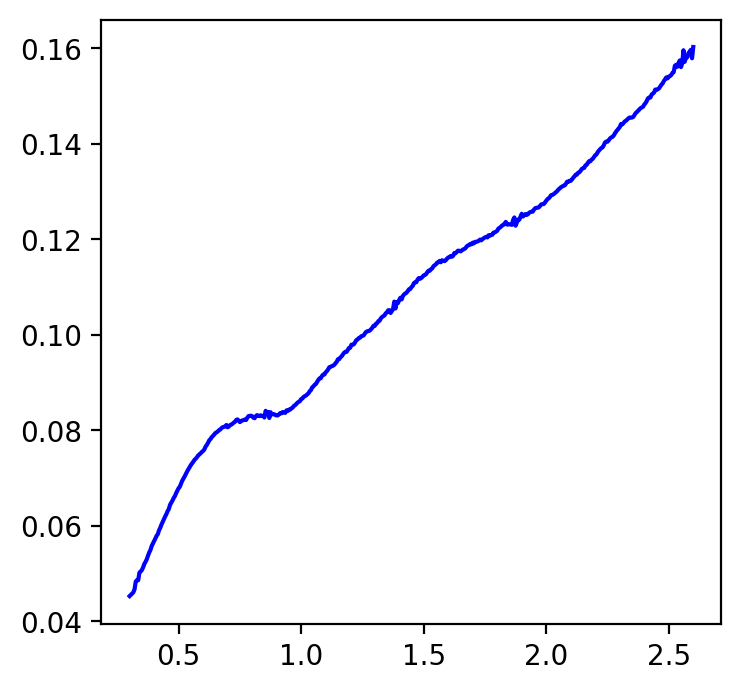

In [72]:
specid='C4LS09'
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
cur_data= get_reflectance_data(spectrum_id='C1LU07', spectra_db=relab_db, CRISM_match=False)
ax.plot(cur_data['Wavelength(micron)'],
            cur_data['Reflectance'],
            color="blue",
            label=specid)


C1PL06


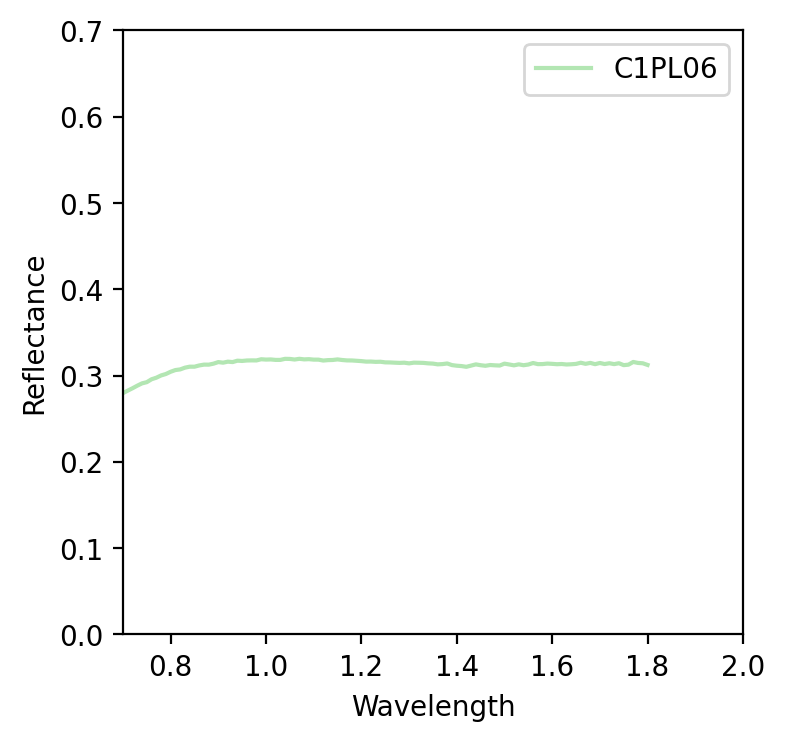

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
l = a['SpectrumID'].tolist()
colors = [LIGHT_GREEN, DARK_GREEN, LIGHT_BLUE, PINK, DARK_BLUE, RED, "black", "blue", "yellow"]
for index, specid in enumerate(l):
    print(specid)
    cur_data= get_reflectance_data(spectrum_id=specid, spectra_db=relab_db, CRISM_match=False)
    ax.plot(cur_data['Wavelength(micron)'],
            cur_data['Reflectance'],
            color=colors[index],
            label=specid)
ax.set_ylabel("Reflectance")
ax.set_xlabel("Wavelength")
ax.set_ylim((0, 0.7))
ax.set_xlim((min(cur_data['Wavelength(micron)']), 2))
plt.legend()
plt.show()
# fig.savefig(MODULE_DIR + "/output/figures/endmembers.pdf")

In [2]:
USGS_data = get_USGS_data("olivine (Fo80)", CRISM_match=False)

In [4]:
endmember = "olivine (Fo51)"
file_name = USGS_DATA + endmember + ".csv"
for r in ["(", ")", " "]:
    file_name = file_name.replace(r, "").lower()
data = pd.read_csv(file_name)

In [5]:
data.loc[data['reflectance'] < 0, 'reflectance'] = 0

In [ ]:
for endmember in USGS_PURE_ENDMEMBERS:
    if endmember != 'basaltic glass':
        USGS_data = get_USGS_data(endmember, CRISM_match=False)
        if USGS_data['wavelength'].tolist() != oliv_fo80_wavelengths:


In [ ]:
from utils.plotting import *
plot_endmembers()

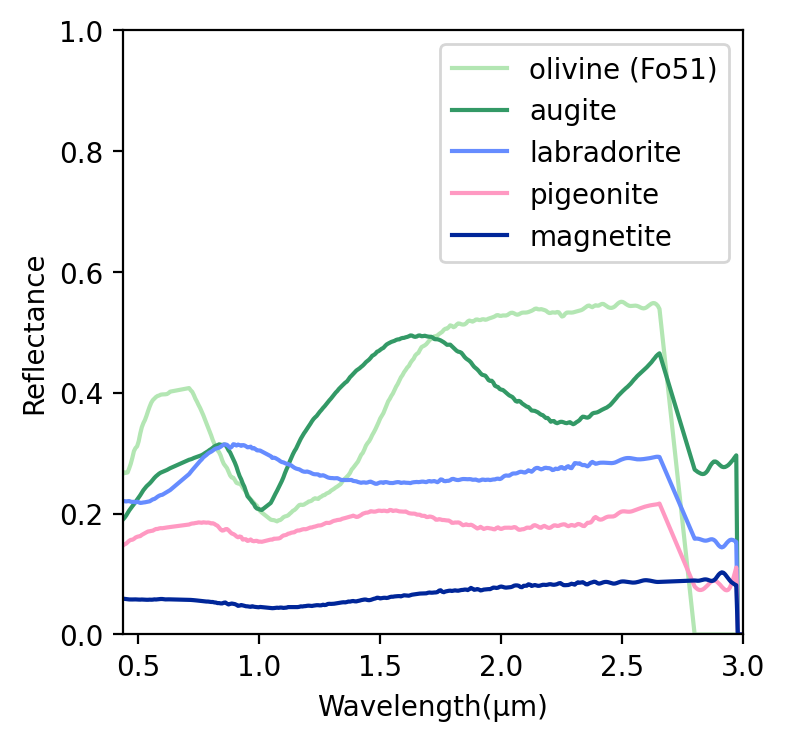

In [1]:
from utils.plotting import *
plot_endmembers(CRISM_match=True)

#### Verify angles of RELAB data

From RELAB documentation here http://www.planetary.brown.edu/relabdata/catalogues/Catalogue_README.html

SourceAngle = Angle of illumination in degrees

DetectAngle = Angle of emergence or detection in degrees

In [ ]:
from utils.access_data import *
spectra_db = get_data()

In [18]:
# SourceAngle
# DetectAngle 
OLIVINE_SID = "C1PO17" 

source_angle = spectra_db[spectra_db['SpectrumID']  == OLIVINE_SID]['SourceAngle'].values[0]
phase_angle = spectra_db[spectra_db['SpectrumID']  == OLIVINE_SID]['PhaseAngle'].values[0]
emission_angle = spectra_db[spectra_db['SpectrumID']  == OLIVINE_SID]['DetectAngle'].values[0]
print("Incidence angle: " + str(source_angle) + ", phase angle: " + str(phase_angle)
      + ", emission angle: " + str(emission_angle))

Source angle: 30.0, phase angle: 30.0, emission angle: 0.0
